In [ ]:
import random
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize) # display the complete matrix
import matplotlib.pyplot as plt
from __future__ import division 
from scipy import stats
from tqdm import tqdm

In [ ]:
## global variables and parameters
l = 20 #length of m1's chamber
m1 = 2
m2 = 1
m = m1+m2

## billiard representation
l2 = l*(m2/m)**(1/2) # when the position of the second billiard, represented by y, is in (0,l1), m2 is in the entry chamber, also the billiard (x,y) is in the triangle area
l1 = l*(m1/m)**(1/2)
theta = np.arctan((m2/m1)**(1/2)) # angle between the hypotenuse and the top side
print("l1, l2: ",l1,l2)

# normal distribution of v1
mu = 0 # velocity can be positive or negative, define the positive direction to be the right
sigma = 10

# three points of the triangle
left_top = [0,l2]
bottom = [0,0]
right_top = [l1,l2]


l1, l2:  16.32993161855452 11.547005383792515


In [ ]:
def line(p1, p2): # input list, [0] is x, [1] is y
    A = (p1[1] - p2[1]) # delta y
    B = (p2[0] - p1[0]) # delta x
    C = (p1[0]*p2[1] - p2[0]*p1[1])
    return A, B, -C

'''
Input: two lines, both are 3-element tuples
Return: one 2-element tuple or False
'''
def intersection(L1, L2): # input two lines
    D  = L1[0] * L2[1] - L1[1] * L2[0]
    Dx = L1[2] * L2[1] - L1[1] * L2[2]
    Dy = L1[0] * L2[2] - L1[2] * L2[0]
    # print(D)
    if D != 0:
        x = Dx / D
        y = Dy / D
        # print('case 1')
        return x,y
    else:
        
        # print('case 2')
        return False

Source: https://stackoverflow.com/questions/20677795/how-do-i-compute-the-intersection-point-of-two-lines

In [ ]:
def angle(vector_1, vector_2): # input two vectors [x,y]
    unit_vector_1 = vector_1 / np. linalg. norm(vector_1)
    unit_vector_2 = vector_2 / np. linalg. norm(vector_2)
    dot_product = np. dot(unit_vector_1, unit_vector_2)
    angle = np. arccos(dot_product)
    return angle # in radians

In [ ]:
left = line(left_top, bottom)
top = line(left_top, right_top)
hypo = line(bottom, right_top)
'''
determine where the next collision will be.
input: current x,y,v1,v2
return: v2
'''
def collide(x,y,v1,v2):
    while True:
        x_list.append(x)
        # x_alt.append(x)
        y_list.append(y)
        # y_alt.append(y)
        p1 = [x,y]
        p2 = [x+v1,y+v2]
        # x_alt.append(p2[0])
        # y_alt.append(p2[1])
        way = line(p1,p2) # the intended straight-line motion

        # which side will the velocity vector intersect, within the range of the triangle
        xLeft = intersection(way, left)
        alreadyHit = False
        if xLeft:
            if xLeft[0]==0 and xLeft[1]<l2 and xLeft[1]>0 and v1<0: 
                alreadyHit = True
                x = xLeft[0]
                y = xLeft[1]
                v1,v2 = hitLeft(v1,v2) # velocity after collision
                # print("v1,v2 after colliding with left is ", v1,v2)                    

        xTop = intersection(way, top)
        # print("xTop: ",xTop)
        if xTop:
            if xTop[0]<l1 and xTop[0]>0 and v2>0:
                alreadyHit = True
                x_list.append(xTop[0])
                y_list.append(xTop[1])
                # out, record the exiting v2
                # v2_seq.append(v2)
                # print("out:",v2)
                break
                
        xHypo = intersection(way, hypo)
        if xHypo: # incase the vector is parallel to hypo and xhypo is a boolean
            if xHypo[0]<l1 and xHypo[0]>0 and xHypo[1]<l2 and xHypo[1]>0 and alreadyHit == False: # assumption: the line only intersects with one of the three sides within the range
                x = xHypo[0]
                y = xHypo[1]
                v1,v2 = hitHypo(v1,v2) # velocity after collision
                # print("v1,v2 after colliding with hypotenuse is ",v1, v2)

    # after exiting the while loop            
    return v2


In [ ]:
'''
Given the collision position and a velocity vector, find the reflected velocity.
Input: v1, v2
Output: v1, v2
'''
def hitHypo(v1,v2):
    # find new velocity
    V = (v1**2+v2**2)**(1/2) # norm of velocity
    upHyp = [l1,l2] # vector in the up direction along the hypotenuse
    vector_v = [v1,v2]
    intersection_angle = angle(vector_v,upHyp)
    beta = np.pi - intersection_angle - theta
    v1 = -np.cos(beta)*V
    v2 = np.sin(beta)*V
    return v1,v2
    
def hitLeft(v1,v2):
    # find new velocity
    v1 = -v1
    return v1,v2

In [ ]:
'''
Initialize m1 by choosing its position and velocity from uniform distribution and normal distribution respectively.
Returns the position and velocity of m1.
'''
def activateM1():
    x = random.uniform(0,l1) # generate a position within the range (0,l1)
    v1 = random.gauss(0, 30)
    return x,v1

In [ ]:
def simulation(initial_v2,n): # revised for transition matrix 
    v2_seq = []
    v2 = initial_v2
    # x_list = []
    # y_list = []
    for i in range(n): # n is the number of repetitions
        x,v1 = activateM1()
        temp = collide(x,l2,v1,v2) # temp is v2 after the collision
        v2_seq.append(temp) # always use the input v2!!!
        # v2 = -temp 

    if n==1: # visualize the first trajectory
        plt.plot([0,0,l1,0],[l2,0,l2,l2])
        plt.plot(x_list,y_list)
        # plt.plot(x_alt,y_alt,color='red')
        
    return v2_seq


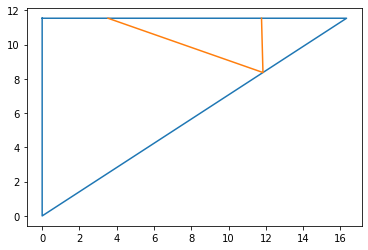

In [ ]:
# visualization
# v2_seq = []
x_list = []
y_list = []
results = simulation(-1,1) # v2 should always be negative

integer results:  [19, 0, 51, 10, 11, 18, 29, 6, 7, 11, 14, 3, 26, 12, 1, 40, 8, 38, 14, 8, 51, 18, 23, 14, 19, 38, 11, 4, 9, 23, 22, 6, 15, 31, 2, 11, 12, 31, 18, 2, 27, 11, 38, 27, 10, 13, 51, 61, 16, 32, 19, 8, 11, 4, 10, 7, 50, 48, 11, 34, 45, 23, 39, 29, 17, 0, 10, 1, 2, 12, 4, 46, 71, 13, 30, 9, 45, 29, 38, 7, 26, 17, 15, 51, 16, 19, 31, 7, 51, 12, 7, 18, 6, 16, 46, 12, 2, 42, 47, 32, 25, 23, 40, 7, 9, 31, 22, 14, 0, 43, 20, 13, 26, 23, 1, 33, 15, 65, 28, 8, 44, 9, 7, 65, 14, 48, 42, 23, 16, 20, 31, 11, 30, 6, 64, 2, 5, 15, 1, 22, 57, 27, 9, 10, 33, 12, 22, 3, 43, 1, 7, 40, 18, 28, 35, 28, 3, 2, 2, 38, 3, 17, 1, 20, 8, 19, 20, 2, 1, 7, 30, 5, 45, 8, 49, 47, 2, 24, 34, 25, 14, 4, 10, 33, 0, 23, 1, 26, 17, 19, 2, 2, 5, 30, 23, 50, 2, 21, 3, 8, 38, 13, 42, 48, 9, 22, 10, 9, 12, 28, 73, 25, 21, 43, 16, 28, 3, 33, 32, 1, 6, 14, 15, 29, 20, 12, 46, 33, 25, 20, 27, 36, 21, 4, 1, 29, 6, 47, 16, 44, 20, 31, 12, 13, 41, 0, 39, 11, 10, 6, 48, 3, 4, 37, 8, 14, 12, 30, 3, 28, 14, 4, 20, 7, 21

(array([29., 28., 32., 18., 31., 25., 24., 21., 22., 24., 24., 22., 27.,
        19., 26., 26., 19., 22., 14., 26., 21., 21., 21., 21., 17., 20.,
        16., 19., 16.,  8., 14., 21., 18., 15., 16., 16., 13., 14., 11.,
         9., 10., 12., 14., 11.,  7.,  8.,  7.,  9.,  6.,  5.,  7.,  4.,
         5., 10.,  5.,  6.,  4.,  9.,  3.,  5.,  6.,  3.,  2.,  0.,  2.,
         3.,  2.,  2.,  3.,  2.,  0.,  0.,  5.,  0.,  0.,  1.,  3.,  0.,
         1.,  3.,  2.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 0.22433416,  1.12342998,  2.02252581,  2.92162163,  3.82071746,
         4.71981328,  5.61890911,  6.51800493,  7.41710076,  8.31619658,
         9.2152924 , 10.11438823, 11.01348405, 11.91257988, 12.8116757 ,
        13.71077153, 14.60986735, 15.50896318, 16.408059  , 17.30715483,
        18.20625065, 19.10534647, 20.0044423 , 20.90353812, 21.80263395,
        22.70172977, 23.6008256 , 24.49992142, 25.39901725, 26.298113

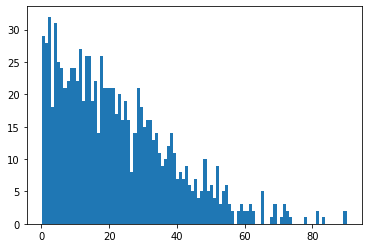

In [ ]:
# distribution
# v2_seq = []
rep = 1000
results = simulation(-1,rep) # v2 should always be negative
int_results = [int(x) for x in results]
print("integer results: ", int_results)
plt.hist(results, 100)

In [ ]:
l=[0,1,2,3,0.5]
l[0:4]

[0, 1, 2, 3]

In [ ]:
def getP(n):
    # transition matrix
    P = np.zeros((n,n))
    for i in tqdm(range(0,n)): # index of the row, meaning the initial speed # speed starts from 1
        rep = 1000
        initial_v2 = -i # v2 should always be negative
        if i == 0:
            initial_v2 = -0.0000000001
        results = simulation(initial_v2, rep)  # results is the list of speeds after one collision
        # print("len(results)",len(results)) # length of results should be exactly equal to rep every time
        int_results = [int(x) for x in results] # same number as rep

        # fill up the i-th row
        for j in range(0,n):
            # if j is not the last element n-1
            if j != n-1:
                occur = int_results.count(j)
                p = occur/rep
                P[i][j] = p
            if j == n-1:
                P[i][j]=1-np.sum(P[i][0:j]) # P[i][0:j] is the sum of the i-th row except for the last element
        print("sum of P[{}] is ".format(i), np.sum(P[i]))

    # print("P:",P)
    return P
    

In [ ]:
# matrix size
n = 120 # range of initial and transitioned speeds
P=0
P = getP(n)
print(P[99])

  2%|▏         | 2/120 [00:00<00:07, 16.76it/s]

sum of P[0] is  1.0
sum of P[1] is  1.0
sum of P[2] is  1.0
sum of P[3] is  1.0


  4%|▍         | 5/120 [00:00<00:09, 12.20it/s]

sum of P[4] is  1.0
sum of P[5] is  1.0


  8%|▊         | 9/120 [00:00<00:08, 13.40it/s]

sum of P[6] is  1.0
sum of P[7] is  1.0
sum of P[8] is  1.0


  9%|▉         | 11/120 [00:00<00:08, 13.42it/s]

sum of P[9] is  0.9999999999999998
sum of P[10] is  1.0
sum of P[11] is  1.0


 12%|█▎        | 15/120 [00:01<00:10, 10.44it/s]

sum of P[12] is  1.0
sum of P[13] is  1.0
sum of P[14] is  1.0


 14%|█▍        | 17/120 [00:01<00:09, 11.14it/s]

sum of P[15] is  1.0
sum of P[16] is  1.0
sum of P[17] is  1.0


 18%|█▊        | 21/120 [00:01<00:08, 11.70it/s]

sum of P[18] is  1.0
sum of P[19] is  1.0
sum of P[20] is  1.0


 19%|█▉        | 23/120 [00:01<00:07, 12.22it/s]

sum of P[21] is  1.0
sum of P[22] is  1.0
sum of P[23] is  1.0


 22%|██▎       | 27/120 [00:02<00:08, 11.45it/s]

sum of P[24] is  1.0
sum of P[25] is  1.0
sum of P[26] is  1.0


 24%|██▍       | 29/120 [00:02<00:07, 11.94it/s]

sum of P[27] is  1.0
sum of P[28] is  1.0
sum of P[29] is  1.0


 28%|██▊       | 33/120 [00:02<00:08, 10.21it/s]

sum of P[30] is  1.0
sum of P[31] is  1.0
sum of P[32] is  1.0


 29%|██▉       | 35/120 [00:03<00:08, 10.46it/s]

sum of P[33] is  1.0
sum of P[34] is  1.0
sum of P[35] is  1.0


 32%|███▎      | 39/120 [00:03<00:07, 10.63it/s]

sum of P[36] is  1.0
sum of P[37] is  1.0
sum of P[38] is  1.0


 34%|███▍      | 41/120 [00:03<00:07, 10.60it/s]

sum of P[39] is  1.0
sum of P[40] is  1.0
sum of P[41] is  1.0


 36%|███▌      | 43/120 [00:03<00:07, 10.41it/s]

sum of P[42] is  1.0
sum of P[43] is  1.0


 39%|███▉      | 47/120 [00:04<00:07,  9.87it/s]

sum of P[44] is  1.0
sum of P[45] is  1.0
sum of P[46] is  1.0


 41%|████      | 49/120 [00:04<00:07, 10.00it/s]

sum of P[47] is  1.0
sum of P[48] is  1.0


 42%|████▎     | 51/120 [00:04<00:07,  8.72it/s]

sum of P[49] is  1.0
sum of P[50] is  1.0
sum of P[51] is  1.0


 46%|████▌     | 55/120 [00:05<00:06, 10.34it/s]

sum of P[52] is  1.0
sum of P[53] is  1.0
sum of P[54] is  1.0


 48%|████▊     | 57/120 [00:05<00:06,  9.52it/s]

sum of P[55] is  1.0
sum of P[56] is  1.0


 49%|████▉     | 59/120 [00:05<00:06,  8.73it/s]

sum of P[57] is  1.0
sum of P[58] is  1.0


 52%|█████▏    | 62/120 [00:05<00:06,  8.78it/s]

sum of P[59] is  1.0
sum of P[60] is  1.0
sum of P[61] is  1.0


 53%|█████▎    | 64/120 [00:06<00:06,  8.44it/s]

sum of P[62] is  1.0
sum of P[63] is  1.0


 55%|█████▌    | 66/120 [00:06<00:06,  7.98it/s]

sum of P[64] is  1.0
sum of P[65] is  1.0


 57%|█████▊    | 69/120 [00:06<00:06,  8.42it/s]

sum of P[66] is  1.0
sum of P[67] is  1.0
sum of P[68] is  1.0


 58%|█████▊    | 70/120 [00:06<00:05,  8.36it/s]

sum of P[69] is  1.0
sum of P[70] is  1.0


 62%|██████▏   | 74/120 [00:07<00:04,  9.25it/s]

sum of P[71] is  1.0
sum of P[72] is  1.0
sum of P[73] is  1.0


 63%|██████▎   | 76/120 [00:07<00:04,  9.18it/s]

sum of P[74] is  1.0
sum of P[75] is  1.0
sum of P[76] is  1.0


 66%|██████▌   | 79/120 [00:07<00:04,  9.20it/s]

sum of P[77] is  1.0
sum of P[78] is  1.0


 68%|██████▊   | 81/120 [00:08<00:03,  9.79it/s]

sum of P[79] is  1.0
sum of P[80] is  1.0


 69%|██████▉   | 83/120 [00:08<00:04,  8.68it/s]

sum of P[81] is  1.0
sum of P[82] is  1.0
sum of P[83] is  1.0


 72%|███████▎  | 87/120 [00:08<00:03,  9.37it/s]

sum of P[84] is  1.0
sum of P[85] is  1.0
sum of P[86] is  1.0


 75%|███████▌  | 90/120 [00:09<00:03,  9.56it/s]

sum of P[87] is  1.0
sum of P[88] is  1.0
sum of P[89] is  1.0


 77%|███████▋  | 92/120 [00:09<00:02,  9.90it/s]

sum of P[90] is  1.0
sum of P[91] is  1.0


 79%|███████▉  | 95/120 [00:09<00:02,  9.04it/s]

sum of P[92] is  1.0
sum of P[93] is  1.0
sum of P[94] is  1.0


 81%|████████  | 97/120 [00:09<00:02,  8.28it/s]

sum of P[95] is  1.0
sum of P[96] is  1.0


 82%|████████▎ | 99/120 [00:10<00:02,  8.59it/s]

sum of P[97] is  1.0
sum of P[98] is  1.0


 84%|████████▍ | 101/120 [00:10<00:02,  7.97it/s]

sum of P[99] is  0.9999999999999999
sum of P[100] is  1.0


 86%|████████▌ | 103/120 [00:10<00:02,  6.78it/s]

sum of P[101] is  1.0
sum of P[102] is  1.0


 88%|████████▊ | 106/120 [00:10<00:01,  7.65it/s]

sum of P[103] is  1.0
sum of P[104] is  0.9999999999999999
sum of P[105] is  1.0


 90%|█████████ | 108/120 [00:11<00:01,  7.20it/s]

sum of P[106] is  0.9999999999999999
sum of P[107] is  1.0


 92%|█████████▏| 110/120 [00:11<00:01,  7.38it/s]

sum of P[108] is  1.0
sum of P[109] is  1.0


 93%|█████████▎| 112/120 [00:11<00:00,  8.24it/s]

sum of P[110] is  1.0
sum of P[111] is  1.0


 96%|█████████▌| 115/120 [00:12<00:00,  8.97it/s]

sum of P[112] is  1.0
sum of P[113] is  1.0
sum of P[114] is  1.0
sum of P[115] is  0.9999999999999999


 98%|█████████▊| 118/120 [00:12<00:00,  8.32it/s]

sum of P[116] is  0.9999999999999998
sum of P[117] is  1.0


100%|██████████| 120/120 [00:12<00:00,  9.50it/s]

sum of P[118] is  1.0
sum of P[119] is  0.9999999999999999
[0.    0.    0.    0.    0.004 0.    0.003 0.    0.    0.    0.003 0.001
 0.001 0.005 0.006 0.004 0.004 0.001 0.005 0.012 0.004 0.012 0.007 0.007
 0.006 0.006 0.008 0.007 0.011 0.009 0.01  0.004 0.016 0.007 0.006 0.016
 0.015 0.015 0.014 0.008 0.009 0.01  0.006 0.012 0.01  0.008 0.004 0.015
 0.012 0.015 0.008 0.012 0.006 0.013 0.015 0.01  0.016 0.018 0.014 0.009
 0.012 0.009 0.007 0.004 0.014 0.011 0.013 0.009 0.007 0.014 0.012 0.017
 0.015 0.006 0.006 0.015 0.01  0.018 0.015 0.024 0.01  0.012 0.02  0.009
 0.009 0.01  0.015 0.006 0.014 0.007 0.01  0.01  0.015 0.011 0.015 0.008
 0.005 0.016 0.007 0.012 0.008 0.012 0.007 0.004 0.002 0.005 0.006 0.002
 0.009 0.006 0.002 0.001 0.004 0.001 0.001 0.002 0.004 0.    0.001 0.005]


In [ ]:
def matrixMul(matrix, n):
    if(n == 1):
        return matrix
    else:
            tempArr = matrix;
            for i in range(1, n-1):
                tempArr = np.matmul(matrix, tempArr)
            return tempArr

In [ ]:
# look at some row of the matrix P^n
def Pn_i(n, Pn, i): 
    if i <= len(Pn)-1:
        print("When n = {}".format(n))
        print("Sum of the {}-th row: ".format(i), sum(Pn[i])) # after taking the powers of P, the sum of the probabilities is smaller
        # print("Distribution of the {}-th row: ".format(i), Pn[i])
        plt.plot(Pn[i])
        plt.title("Distribution of the {}-th row: ".format(i))

When n = 100
Sum of the 9-th row:  0.999999999999995
None
When n = 1000
Sum of the 9-th row:  0.9999999999999929
None


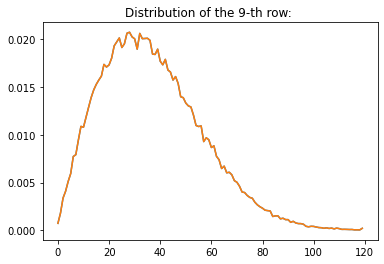

In [ ]:
n = 100
Pn = matrixMul(P, n) # find limiting distribution P^n
print(Pn_i(n, Pn, 9))
n = 1000
Pn = matrixMul(P, n) # find limiting distribution P^n
print(Pn_i(n, Pn, 9))

see the case where m1 > m2

think about higher initial speed rows - google.